# Test LARMIP and LARMIP-2

In [1]:
import sys
sys.path.append('../code')
import importlib
import glob

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from IPython.display import display
import pandas as pd

import func_misc as misc
import func_ant as ant

In [94]:
importlib.reload(ant)

<module 'func_ant' from '../code/func_ant.py'>

In [3]:
def comp_plot_dist(X_ens, lo, hi, title_in, SCE):
    '''Easily compute the distribution, plot a histogram and table of percentile 
    values'''
    nbin = int(hi - lo)*20
    X_pdf, bins = np.histogram(X_ens, bins=nbin, range=(lo, hi), density=True)
    bin_centers = (bins[1:] + bins[:-1])/2

    plt.bar(bin_centers, X_pdf, width=1)
    plt.ylabel('PDF')
    plt.title(title_in + ' for '+SCE)
    plt.show()
    
    Perc  = (1,5,10,17,20,50,80,83,90,95,99,99.5,99.9)
    perc = misc.perc_df(X_pdf, Perc, bin_centers)
    print("### Distribution ###")
    display(perc)

In [10]:
data_dir = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'
DIR_T = data_dir+'Data_AR5/Tglobal/'
start_date2 = 2006
ye = 2100

LowPass = False
SCE = 'rcp85'
GAM = 1
MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0","GFDL-ESM2G", \
    "GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES","inmcm4","IPSL-CM5A-LR", \
    "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM","MIROC-ESM","MPI-ESM-LR","MPI-ESM-MR", \
    "MRI-CGCM3","NorESM1-ME","NorESM1-M"]

N = int(1e5)
NormD  = np.random.normal(0, 1, N)
TEMPf = 'AR5' # 'all', 'AR5'

if TEMPf == 'all':
    path = DIR_T+'global_tas_Amon_*_'+SCE+'_r1i1p1.dat'
    if nl.INFO:
        print(path)
    files     = glob.glob(path)
elif TEMPf == 'AR5':
    files = misc.temp_path_AR5(MOD, DIR_T, SCE)
else:
    print('Option TEMPf: ' + nl.TEMPf + ' is not supported')
    
temp_files = files
UnifDd = np.random.uniform(0, 1, N)

In [403]:
%%time
X_ant = ant.ant_dyn_larmip(SCE, MOD, start_date2, ye, GAM, NormD, UnifDd, data_dir, files, 'LARMIP', LowPass)

CPU times: user 7.43 s, sys: 5.13 s, total: 12.6 s
Wall time: 14.2 s


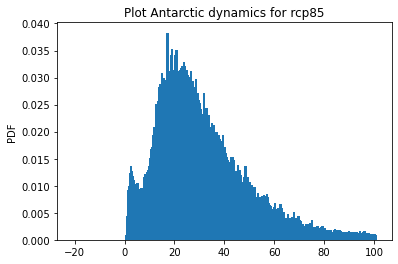

### Distribution ###


,values
percentiles,
1.0,2.375
5.0,7.275
10.0,11.625
17.0,14.875
20.0,16.025
50.0,26.675
80.0,42.675
83.0,45.325
90.0,53.675


In [404]:
comp_plot_dist(X_ant[:,-1], -20.5, 100.5, 'Plot Antarctic dynamics', SCE)

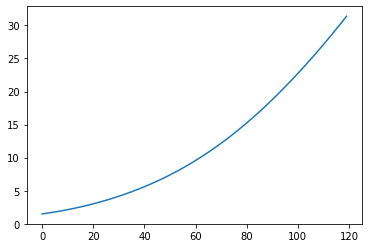

In [405]:
X_ant_m = np.mean(X_ant,0)
plt.plot(X_ant_m)

Expected value seems to behave in the same way as the NCL code

Why is there a big jump in the distribution in 0?
Need some further investigations.

Probably from the fact that the coefficients relating GMST and subsurface temperature at the ice shelves are forced to be positive.

### Test LARMIP2 implementation

In [95]:
%%time
X_ant2 = ant.ant_dyn_larmip(SCE, MOD, start_date2, ye, GAM, NormD, UnifDd, data_dir, files, 'LARMIP2', True, LowPass)

CPU times: user 9.48 s, sys: 7.16 s, total: 16.6 s
Wall time: 21 s


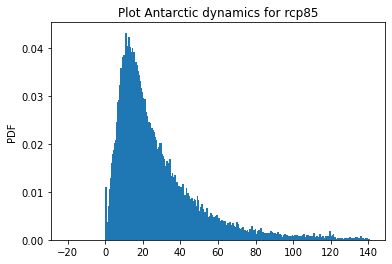

### Distribution ###


,values
percentiles,
1.0,2.525
5.0,5.375
10.0,7.575
17.0,9.775
20.0,10.625
50.0,19.475
80.0,36.775
83.0,39.925
90.0,49.825


In [92]:
comp_plot_dist(X_ant2[:,-1], -20.5, 140.5, 'Plot Antarctic dynamics', SCE)

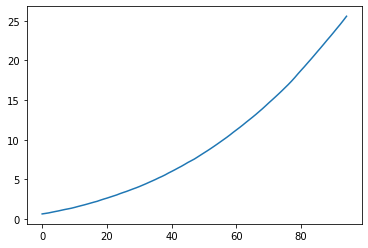

In [13]:
X_ant2_m = np.mean(X_ant2,0)
plt.plot(X_ant2_m)

Next steps:
- Use the LARMIP2 LRF (try to use the same code/function for both LARMIP and LARMIP2 cases)
- Use CMIP6 instead of CMIP5 temperature
- Compare time series to coefficients
- Compute the coefficients for CMIP6
- Where is the script that includes a positive feedback between the freshwater and mass loss?